In [1]:
from __future__ import absolute_import
from __future__ import print_function

import matplotlib.pyplot as plt
from skimage.exposure import equalize_hist
import numpy as np
import itertools

# from helper import *
import os

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10) # Width and height

You will need to make sure *DataPath* leads to the data set from:


* git clone git@github.com:alexgkendall/SegNet-Tutorial.git

In [2]:
DataPath = '../../SegNet-Tutorial/CamVid/'
data_shape = 360*480

___
This is taken from https://github.com/0bserver07/Keras-SegNet-Basic/blob/master/camvid_data_loader.py#L3
___

In [4]:
# I = plt.imread('../../SegNet-Tutorial/CamVid/train/0001TP_006690.png')

In [5]:
I = plt.imread(DataPath + 'testannot/0001TP_008550.png')

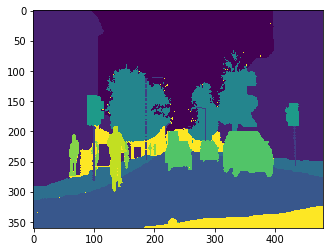

In [6]:
plt.imshow(I*255)

In [7]:
D = plt.imread(DataPath + 'test/0001TP_008550.png')

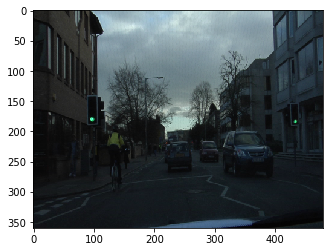

In [8]:
plt.imshow(D)

In [9]:
from skimage.exposure import equalize_hist

In [10]:
def normalized(rgb):
    #return rgb/255.0
    norm=np.zeros((rgb.shape[0], rgb.shape[1], 3),np.float32)

    b=rgb[:,:,0]
    g=rgb[:,:,1]
    r=rgb[:,:,2]

    norm[:,:,0]=equalize_hist(b)
    norm[:,:,1]=equalize_hist(g)
    norm[:,:,2]=equalize_hist(r)

    return norm

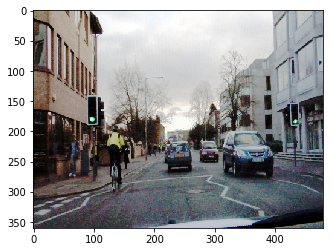

In [11]:
plt.imshow(normalized(D))

In [12]:
D.shape

(360, 480, 3)

In [13]:
os.getcwd()

'/home/ikiskin/Documents/Adam/LCBNN_work/loss-cal-BNN/Segnet'

In [14]:
def one_hot_it(labels):
    x = np.zeros([360,480,12])
    for i in range(360):
        for j in range(480):
            x[i,j,int(labels[i][j])]=1
    return x

In [18]:
DataPath_load = '../../SegNet-Tutorial/'

In [19]:
def load_data(mode):
    data = []
    label = []
    with open(DataPath + mode +'.txt') as f:
        txt = f.readlines()
        txt = [line.split(' ') for line in txt]
    for i in range(len(txt)):
        data.append(np.rollaxis(normalized(plt.imread(DataPath_load + txt[i][0][7:])),2))
#         import pdb; pdb.set_trace()
        label.append(one_hot_it(255*plt.imread(DataPath_load + txt[i][1][7:][:-1])))
        print('.',end='')
    return np.array(data), np.array(label)


In [20]:
train_data, train_label = load_data("train")
# train_label = np.reshape(train_label,(367,data_shape,12))

...............................................................................................................................................................................................................................................................................................................................................................................

In [21]:
test_data, test_label = load_data("test")
# test_label = np.reshape(test_label,(233,data_shape,12))

.........................................................................................................................................................................................................................................

In [22]:
val_data, val_label = load_data("val")
# val_label = np.reshape(val_label,(101,data_shape,12))

.....................................................................................................

In [20]:
# np.save(DataPath + "data/train_data", train_data)
# np.save(DataPath + "data/train_label", train_label)

# np.save(DataPath + "data/test_data", test_data)
# np.save(DataPath + "data/test_label", test_label)

# np.save(DataPath + "data/val_data", val_data)
# np.save(DataPath + "data/val_label", val_label)

In [26]:
# train_label_f = np.reshape(train_label,(367,data_shape,12))
# val_label_f = np.reshape(val_label,(101,data_shape,12))
# test_label_f = np.reshape(test_label,(233,data_shape,12))

In [28]:
np.save("data/train_data", train_data)
np.save("data/train_label", train_label_f)

np.save( "data/test_data", test_data)
np.save( "data/test_label", test_label_f)

np.save("data/val_data", val_data)
np.save("data/val_label", val_label_f)

In [23]:
train_label.shape

(367, 360, 480, 12)

In [24]:
I_h = one_hot_it(255*I)

0 :  Sky


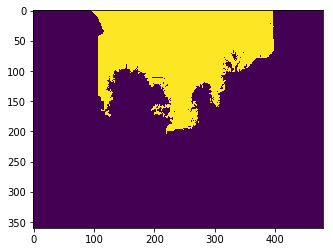

1 :  Building


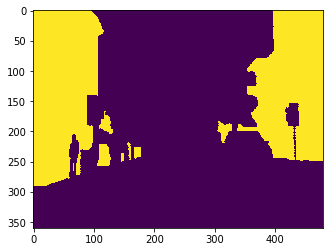

2 :  Pole


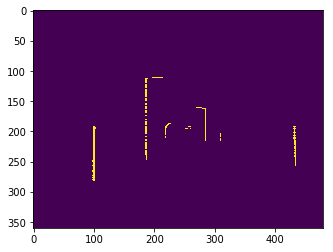

3 :  Road


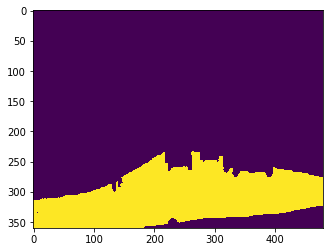

4 :  Pavement


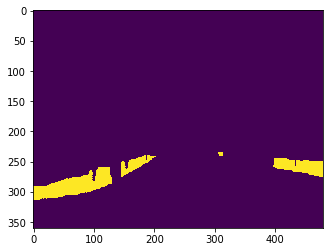

5 :  Tree


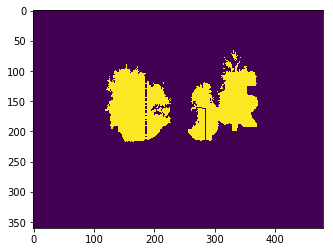

6 :  SignSymbol


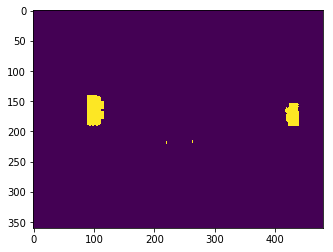

7 :  Fence


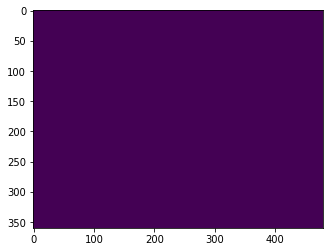

8 :  Car


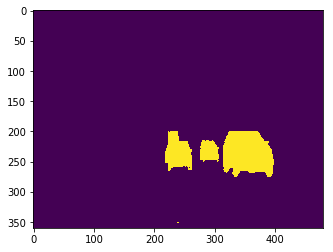

9 :  Pedestrian


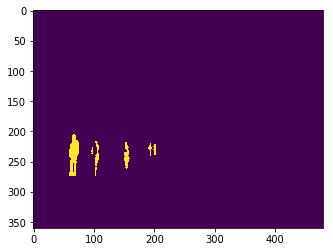

10 :  Cyclist


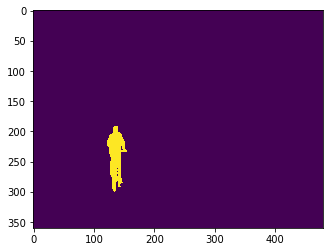

11 :  Unlabelled


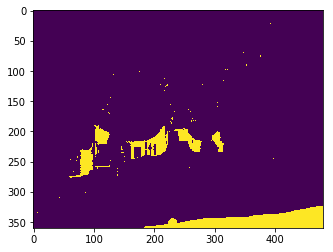

In [25]:
object_name = ['Sky', 'Building', 'Pole', 'Road', 'Pavement',
 'Tree', 'SignSymbol', 'Fence', 'Car', 'Pedestrian','Cyclist','Unlabelled']
for i in range(12):
    print(i,': ' ,object_name[i])
    plt.figure()
    plt.imshow(I_h[:,:,i])
    plt.show()

In [ ]:
# FYI they are:
# Sky = 0 [128,128,128]
# Building = 1 [128,0,0]
# Pole = 2 [192,192,128]
# Road_marking = 3 [255,69,0]
# Road = 4 [128,64,128]
# Pavement = 5 [60,40,222]
# Tree = 6 [128,128,0]
# SignSymbol = 7 [192,128,128]
# Fence = 8 [64,64,128]
# Car = 9 [64,0,128]
# Pedestrian = 10 [64,64,0]
# Bicyclist = 11 [0,128,192]
# Unlabelled = 12 [0,0,0]

In [40]:
# train_data_2 = train_data[:,:,::2,::2]
# train_label_2 = train_label[:,::2,::2,:]

# test_data_2 = test_data[:,:,::2,::2]
# test_label_2 = test_label[:,::2,::2,:]

# val_data_2 = val_data[:,:,::2,::2]
# val_label_2 = val_label[:,::2,::2,:]

In [38]:
# data_shape = 180*240

# train_label_2 = np.reshape(train_label_2,(367,data_shape,12))
# test_label_2 = np.reshape(test_label_2,(233,data_shape,12))
# val_label_2 = np.reshape(val_label_2,(101,data_shape,12))

In [41]:
# # np.save(DataPath + "data/train_data_2", train_data_2)
# np.save(DataPath + "data/train_label_2_u", train_label_2)

# # np.save(DataPath + "data/test_data_2", test_data_2)
# np.save(DataPath + "data/test_label_2_u", test_label_2)

# # np.save(DataPath + "data/val_data_2", val_data_2)
# np.save(DataPath + "data/val_label_2_u", val_label_2)

In [42]:
# train_label_2.shape

(367, 180, 240, 12)